In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Load Data**

In [2]:
# import the dataset loading function from sklearn
from sklearn.datasets import fetch_california_housing

house_dataset = fetch_california_housing()

In [3]:
#display the original data
house_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# Extract features with their names into the dataframe format
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MedPrice
target = pd.Series(house_dataset.target, name='MedPrice')
data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


### **Now let's Split the dataset into training and test set**

In [5]:
from re import X
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)

#check the shape of whole dataset and the splited training and test set
print("--Shape of the whole data--\n{}".format(data.shape))
print("\n--Shape of the target vector--\n {}".format(target.shape))
print("\n--Shape of the training data--\n {}".format(X_train.shape))
print("\n--Shape of the testing data--\n {}".format(X_test.shape))

--Shape of the whole data--
(20640, 8)

--Shape of the target vector--
 (20640,)

--Shape of the training data--
 (16512, 8)

--Shape of the testing data--
 (4128, 8)


In [6]:
(data.shape, target.shape), (X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((20640, 8), (20640,)), ((16512, 8), (16512,)), ((4128, 8), (4128,)))

#Exploratory data analysis and data preprocessing

In [7]:
#check the types of data
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [8]:
#check for feature value type
print("--Feature type--\n{}".format(data.dtypes))
print("--target type--\n{}".format(data.dtypes))

--Feature type--
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object
--target type--
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object


In [9]:
# check for unique feature
print("\n--# The unique feature values --\n{}".format(data.nunique()))


--# The unique feature values --
MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
dtype: int64


**Scale and basic statistics of each feature**

In [10]:
pd.options.display.float_format="{:,.2f}".format
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31


**let's check our data it's have some missing value**

In [11]:
#;copy data to avoid inplace
train_data = X_train.copy()

#add a column "MedPrice" for the target house price
train_data["MedPrice"] = y_train

#chack if there missing values
print(
    "\n-- check missing values in training data --\n{}".format(
        train_data.isnull().any()
    )
)
print("\n-- check missing values in test data --\n{}".format(X_test.isnull().any()))



-- check missing values in training data --
MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
MedPrice      False
dtype: bool

-- check missing values in test data --
MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool


# Feature engineering and feature selection

In [12]:
# i am forget to import seaborn
import seaborn as sns

In [13]:
%matplotlib inline

<Axes: >

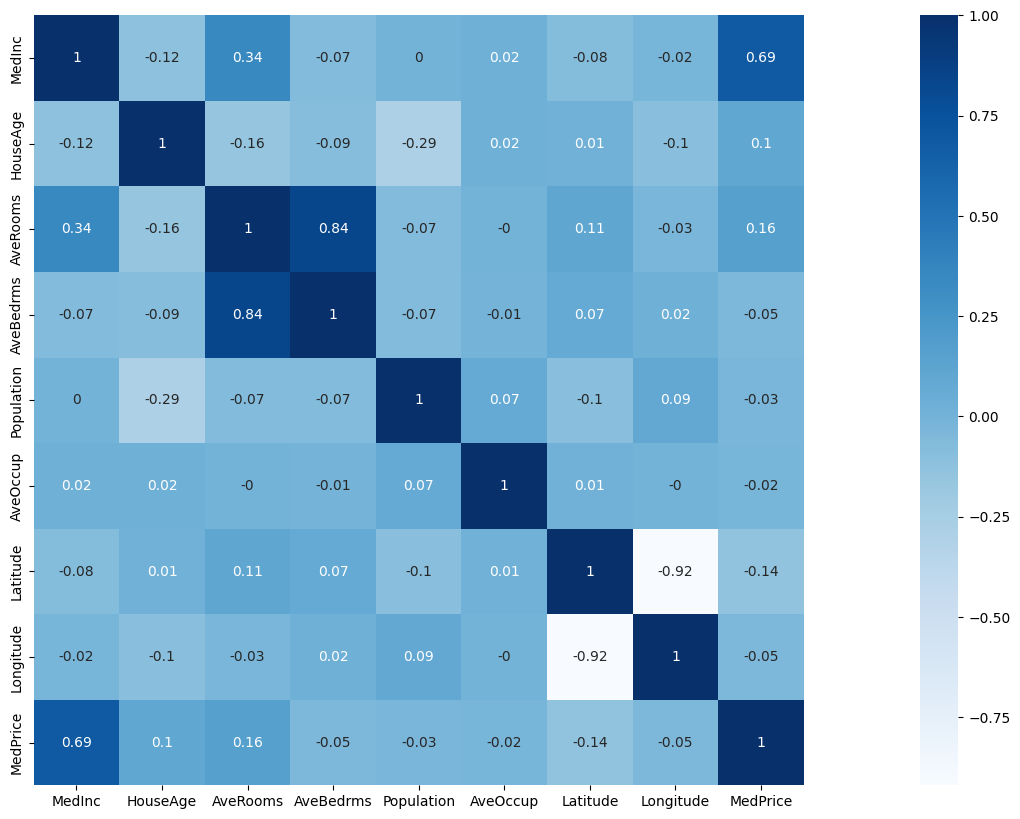

In [14]:
plt.figure(figsize=(30,10))

correlation_matrix = train_data.corr().round(2)
sns.heatmap(
    data = correlation_matrix, square=True, annot=True, cmap="Blues"
)

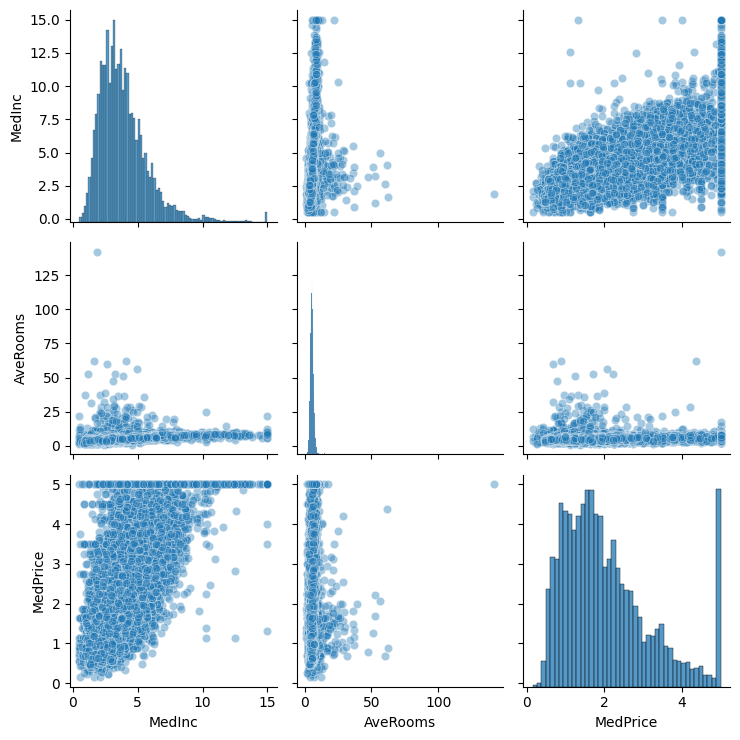

In [16]:
# select high correlation features ad display the pairplot
selected_feature_set = ["MedInc", "AveRooms"]
sub_train_data = train_data[selected_feature_set + ["MedPrice"]]

# Extract the new training features
X_train = sub_train_data.drop(["MedPrice"], axis=1)

#select same feature sets for test data
X_test = X_test[selected_feature_set]

sns.pairplot(sub_train_data, height=2.5, plot_kws={"alpha":0.4})
plt.tight_layout()

# Build up a linear regressor and and a decision tree regressor

## Linear Regression

In [21]:
# libraries for linear regression
from sklearn.linear_model import LinearRegression

#training
# create a linear regressor
linear_regressor = LinearRegression()

#train the model
linear_regressor.fit(X_train, y_train)

#convert the coefficient Values to a dataframe
coefficient = pd.DataFrame(
    linear_regressor.coef_, X_train.columns, columns=["Coefficient"]
)
#display the intercept value
print("Learned intercept: {:.2f}".format(linear_regressor.intercept_))

print("\n--The learned coefficient value learned by the linear regression model--")
print(coefficient)

Learned intercept: 0.60

--The learned coefficient value learned by the linear regression model--
          Coefficient
MedInc           0.44
AveRooms        -0.04


In [22]:

# Import the built-in MSE metric
from sklearn.metrics import mean_squared_error

# Model prediction on training data
y_pred_train = linear_regressor.predict(X_train)
print("\n--Train MSE--\n{}".format(mean_squared_error(y_train, y_pred_train)))


# Testing
y_pred_test = linear_regressor.predict(X_test)

print("Test MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_test)))



--Train MSE--
0.690985965844761
Test MSE: 0.70


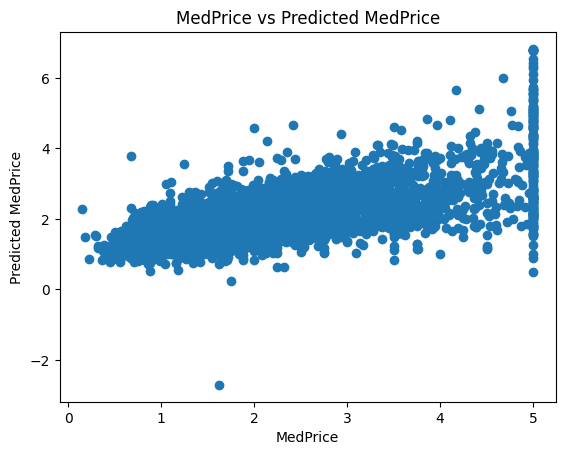

In [23]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel("MedPrice")
plt.ylabel("Predicted MedPrice")
plt.title("MedPrice vs Predicted MedPrice")
plt.show()

<ipython-input-24-5accb9f56495>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_test)


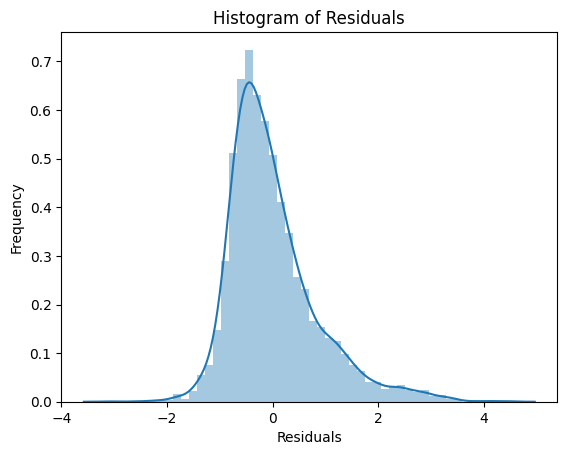

In [24]:
# Checking Normality of errors
sns.distplot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Decision tree

In [25]:
# Import library for decision tree
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [26]:
# Model prediction on training & test data
y_pred_train = tree_regressor.predict(X_train)
y_pred_test = tree_regressor.predict(X_test)

print("Train MSE: {:.2f}".format(mean_squared_error(y_train, y_pred_train)))

print("Test MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_test)))


Train MSE: 0.68
Test MSE: 0.71


In [ ]:
# Plot outputs
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel("MedPrice")
plt.ylabel("Predicted MedPrice")
plt.title("MedPrice vs Predicted MedPrice")
plt.show()